<h1 align="center"> Non-Trivial Facts about Linear Regression </h1>
<h3 align="center"> Author: Nicholas Han </h3>
<h3 align="center"> Date: 2018.11.14 </h3>

In [5]:
import time

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [66]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='darkgrid')
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [67]:
def beta_pair(rho, scale=1):
    W1 = np.random.normal(size=10000)
    W2 = scale*(rho*W1 + np.sqrt(1-rho**2)*np.random.normal(size=10000))
    cov = np.sum((W1-np.mean(W1))*(W2-np.mean(W2)))
    beta12 = cov / np.sum((W1-np.mean(W1))**2)
    beta21 = cov / np.sum((W2-np.mean(W2))**2)
    return beta12, beta21

In [68]:
num_rho = 15
beta12 = np.zeros(num_rho)
beta21 = np.zeros(num_rho)

for i in range(num_rho):
    beta = beta_pair(rho=(i+1)/num_rho, scale=3)
    beta12[i] = beta[0]
    beta21[i] = beta[1]
    
index_range = (np.arange(1, num_rho+1) / num_rho).round(2)

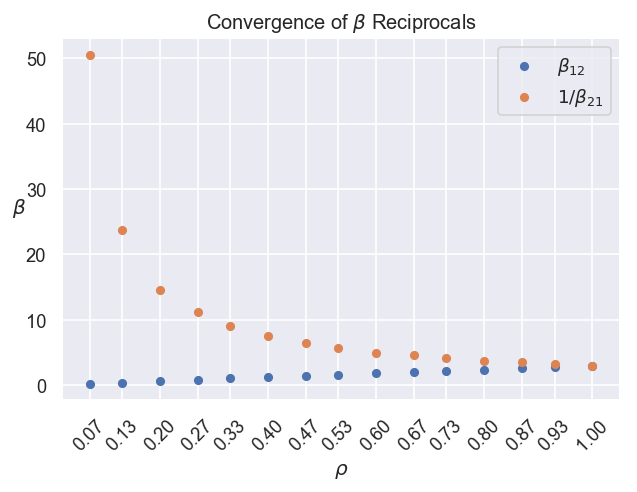

In [69]:
plt.scatter(index_range, beta12, s=20, label=r'$\beta_{12}$')
plt.scatter(index_range, 1/beta21, s=20, label=r'$1/\beta_{21}$')
plt.title(r'Convergence of $\beta$ Reciprocals')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\beta$').set_rotation(0)
plt.xticks(index_range, rotation=45)
plt.legend()
plt.show()

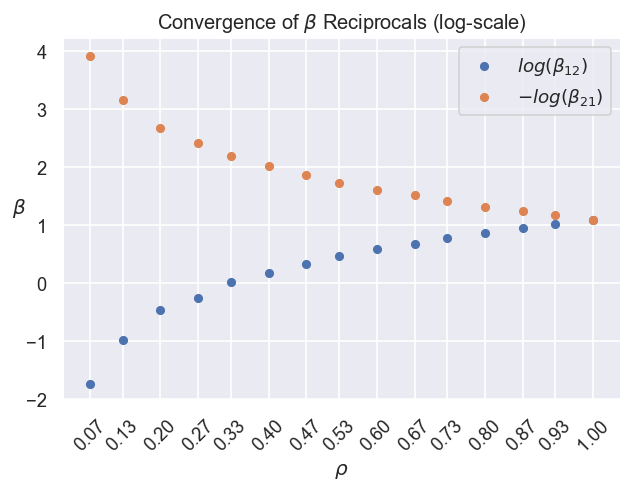

In [70]:
plt.scatter(index_range, np.log(beta12), s=20, label=r'$log(\beta_{12})$')
plt.scatter(index_range, -np.log(beta21), s=20, label=r'$-log(\beta_{21})$')
plt.title(r'Convergence of $\beta$ Reciprocals (log-scale)')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\beta$').set_rotation(0)
plt.xticks(index_range, rotation=45)
plt.legend()
plt.show()

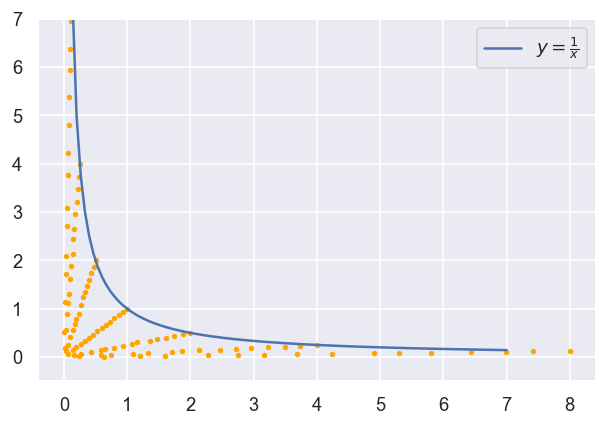

In [79]:
num_rho = 15
grid_width = 7
scale_list = [0.125, 0.25, 0.5, 1, 2, 4, 8]
beta12 = np.zeros(num_rho)
beta21 = np.zeros(num_rho)

plt.plot(np.arange(1, num_rho*grid_width+1)/num_rho, num_rho/np.arange(1, num_rho*grid_width+1),
         label=r'$y=\frac{1}{x}$')
for scale in scale_list:
    for i in range(num_rho):
        beta = beta_pair(rho=(i+1)/num_rho, scale=scale)
        beta12[i] = beta[0]
        beta21[i] = beta[1]
    plt.scatter(beta12, beta21, color='orange', s=5)
    
plt.ylim(bottom=-0.5, top=7)
plt.legend()
plt.show()

In [38]:
reg.coef_[0][0]

0.5095277070414951